# [1]game_logs

# 1

In [1]:
import pandas as pd

data = pd.read_csv('./[1]game_logs.csv')
data.shape

C:\Users\iliya\AppData\Local\Temp\ipykernel_24400\3881192917.py:3: DtypeWarning: Columns (12,13,14,15,19,20,81,83,85,87,93,94,95,96,97,98,99,100,105,106,108,109,111,112,114,115,117,118,120,121,123,124,126,127,129,130,132,133,135,136,138,139,141,142,144,145,147,148,150,151,153,154,156,157,160) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('./[1]game_logs.csv')


(171907, 161)

# 2, 3

In [2]:
import os 
import json

def memory_usage_stats(df, path):
    disk_usage = os.path.getsize(path)
    loaded_memory_usage_per_column = df.memory_usage(deep=True)
    loaded_memory_usage = df.memory_usage(deep=True).sum()
    
    return {'disk_usage': str(disk_usage), 
            'loaded_memory_usage': str(loaded_memory_usage), 
            'column_stats': sorted([{'column_name': column,
                                     'memory_usage': str(loaded_memory_usage_per_column[i]),
                                     'memory_usage_percent': str(loaded_memory_usage_per_column[i] / loaded_memory_usage),
                                     'dtype': str(df[column].dtype) if column in df.columns else 'Index'} 
                                    for i, column in enumerate(['Index'] + list(df.columns))],
                                   key=lambda x: int(x['memory_usage']))}

stats = memory_usage_stats(data, "./[1]game_logs.csv")

with open("1_stats_no_opt.json", "w", encoding="utf-8") as outfile: 
    json.dump(stats, outfile, ensure_ascii=True)

# 4, 5, 6

In [3]:
from pandas.api.types import is_integer_dtype, is_float_dtype

for column in data.columns:
    if data[column].dtype == 'object' and data[column].unique().shape[0] / data[column].shape[0] < 0.5:
        data[column] = data[column].astype('category')
    elif is_integer_dtype(data[column]):
        data[column] = pd.to_numeric(data[column], downcast="integer")
    elif is_float_dtype(data[column]):
        data[column] = pd.to_numeric(data[column], downcast="float")

# 7

In [4]:
stats = memory_usage_stats(data, "./[1]game_logs.csv")

with open("1_stats_opt.json", "w", encoding="utf-8") as outfile: 
    json.dump(stats, outfile, ensure_ascii=True)

# 8

In [5]:
columns = ['date', 'number_of_game', 'day_of_week', 'v_league', 'h_score', 'v_score', 'day_night', 'length_minutes', 'length_outs', 'protest']
dtypes = data[columns].dtypes.to_dict()

In [6]:
data_short = pd.DataFrame([], columns=columns)
for chunk in pd.read_csv("./[1]game_logs.csv", usecols=columns, dtype=dtypes, chunksize=10**6):
    data_short = pd.concat([data_short, chunk.dropna()])
data_short.to_csv('[1]game_logs_short.csv', index=False)

# 9

<Axes: xlabel='day_of_week', ylabel='length_minutes'>

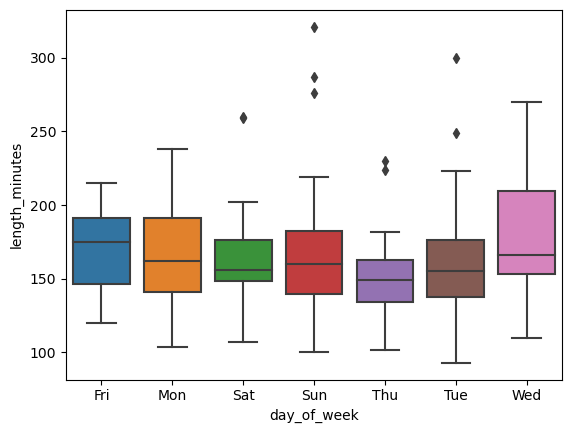

In [7]:
import seaborn as sns
sns.boxplot(x='day_of_week', y='length_minutes', data=data_short)

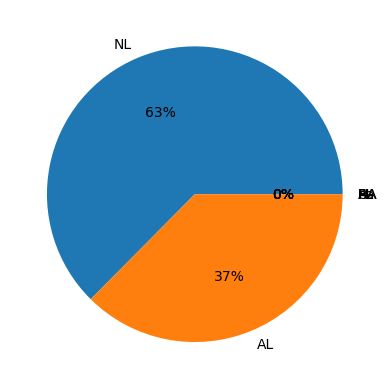

In [8]:
import matplotlib.pyplot as plt
v_league = data_short.v_league.value_counts().to_dict()

plt.pie(list(v_league.values()), labels=list(v_league.keys()), autopct='%.0f%%')
plt.show()

C:\Users\iliya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Axes: xlabel='day_night', ylabel='count'>

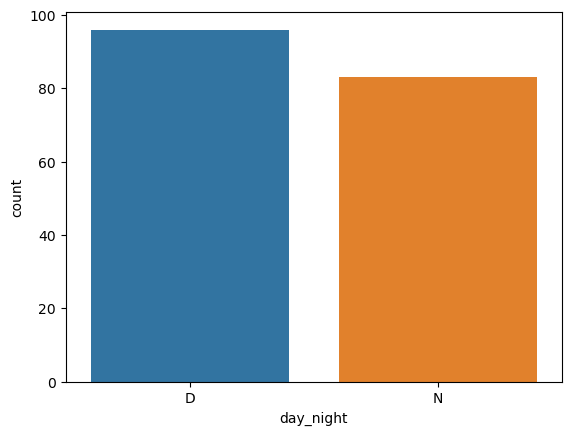

In [9]:
sns.countplot('day_night', data=data_short)

<Axes: xlabel='h_score', ylabel='v_score'>

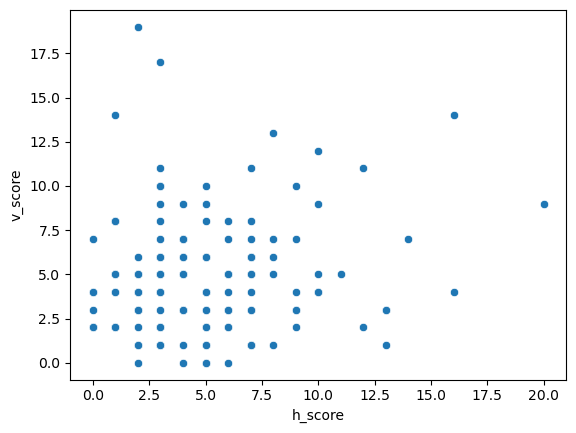

In [10]:
sns.scatterplot(x='h_score', y='v_score', data=data_short)

C:\Users\iliya\AppData\Local\Temp\ipykernel_24400\1130771847.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_short.corr())


<Axes: >

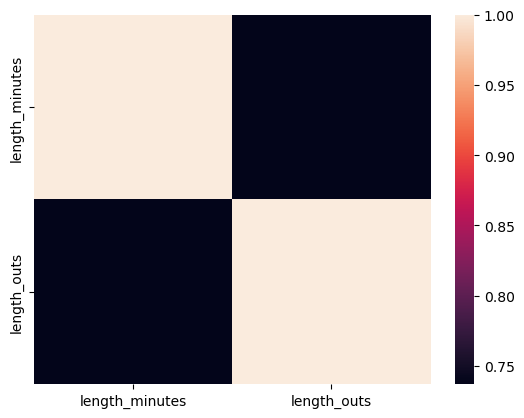

In [11]:
sns.heatmap(data_short.corr())

# [2]automotive.csv

# 1

In [30]:
data = pd.read_csv('./[2]automotive.csv/CIS_Automotive_Kaggle_Sample.csv')
data.shape

C:\Users\iliya\AppData\Local\Temp\ipykernel_24400\3593957122.py:1: DtypeWarning: Columns (1,8,9,17,18,22,25,26,32,37,45,53,65,67,69,79,91,93,107,111,113,120,122,133,144) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('./[2]automotive.csv/CIS_Automotive_Kaggle_Sample.csv')


(5695015, 156)

# 2, 3

In [31]:
stats = memory_usage_stats(data, './[2]automotive.csv/CIS_Automotive_Kaggle_Sample.csv')

with open("2_stats_no_opt.json", "w", encoding="utf-8") as outfile: 
    json.dump(stats, outfile, ensure_ascii=True)

# 4, 5, 6

In [ ]:
for column in data.columns:
    if data[column].dtype == 'object' and data[column].unique().shape[0] / data[column].shape[0] < 0.5:
        data[column] = data[column].astype('category')
    elif is_integer_dtype(data[column]):
        data[column] = pd.to_numeric(data[column], downcast="integer")
    elif is_float_dtype(data[column]):
        data[column] = pd.to_numeric(data[column], downcast="float")

# 7

In [ ]:
stats = memory_usage_stats(data, './[2]automotive.csv/CIS_Automotive_Kaggle_Sample.csv')

with open("2_stats_opt.json", "w", encoding="utf-8") as outfile: 
    json.dump(stats, outfile, ensure_ascii=True)

# 8

In [ ]:
columns = data.columns[:10].to_list()
dtypes = data[columns].dtypes.to_dict()

In [ ]:
data_short = pd.DataFrame([], columns=columns)
for chunk in pd.read_csv("./[2]automotive.csv/CIS_Automotive_Kaggle_Sample.csv", usecols=columns, dtype=dtypes, chunksize=10**6):
    data_short = pd.concat([data_short, chunk.dropna()])
data_short.to_csv('./[2]automotive_short.csv', index=False)

# 9

# [3]flights

# 1

In [12]:
data = pd.read_csv('./[3]flights.csv')
data.shape

C:\Users\iliya\AppData\Local\Temp\ipykernel_24400\4110744492.py:1: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('./[3]flights.csv')


(5819079, 31)

# 2, 3

In [13]:
stats = memory_usage_stats(data, './[3]flights.csv')

with open("3_stats_no_opt.json", "w", encoding="utf-8") as outfile: 
    json.dump(stats, outfile, ensure_ascii=True)

# 4, 5, 6

In [14]:
for column in data.columns:
    if data[column].dtype == 'object' and data[column].unique().shape[0] / data[column].shape[0] < 0.5:
        data[column] = data[column].astype('category')
    elif is_integer_dtype(data[column]):
        data[column] = pd.to_numeric(data[column], downcast="integer")
    elif is_float_dtype(data[column]):
        data[column] = pd.to_numeric(data[column], downcast="float")

# 7

In [15]:
stats = memory_usage_stats(data, "./[3]flights.csv")

with open("3_stats_opt.json", "w", encoding="utf-8") as outfile: 
    json.dump(stats, outfile, ensure_ascii=True)

# 8

In [16]:
columns = data.columns[:10].to_list()
dtypes = data[columns].dtypes.to_dict()

In [17]:
data_short = pd.DataFrame([], columns=columns)
for chunk in pd.read_csv("./[3]flights.csv", usecols=columns, dtype=dtypes, chunksize=10**6):
    data_short = pd.concat([data_short, chunk.dropna()])
data_short.to_csv('[3]flights_short.csv', index=False)

# 9

# [4]vacancies.csv

# 1

In [18]:
data = pd.read_csv('./[4]vacancies.csv/vacancies_2020.csv')
data.shape

(587637, 56)

# 2, 3

In [19]:
stats = memory_usage_stats(data, './[4]vacancies.csv/vacancies_2020.csv')

with open("4_stats_no_opt.json", "w", encoding="utf-8") as outfile: 
    json.dump(stats, outfile, ensure_ascii=True)

# 4, 5, 6

In [20]:
for column in data.columns:
    if data[column].dtype == 'object' and data[column].unique().shape[0] / data[column].shape[0] < 0.5:
        data[column] = data[column].astype('category')
    elif is_integer_dtype(data[column]):
        data[column] = pd.to_numeric(data[column], downcast="integer")
    elif is_float_dtype(data[column]):
        data[column] = pd.to_numeric(data[column], downcast="float")

# 7

In [21]:
stats = memory_usage_stats(data, './[4]vacancies.csv/vacancies_2020.csv')

with open("4_stats_opt.json", "w", encoding="utf-8") as outfile: 
    json.dump(stats, outfile, ensure_ascii=True)

# 8

In [22]:
columns = data.columns[:10].to_list()
dtypes = data[columns].dtypes.to_dict()

In [23]:
data_short = pd.DataFrame([], columns=columns)
for chunk in pd.read_csv('./[4]vacancies.csv/vacancies_2020.csv', usecols=columns, dtype=dtypes, chunksize=10**6):
    data_short = pd.concat([data_short, chunk.dropna()])
data_short.to_csv('[4]vacancies_short.csv', index=False)

# 9

# [5]asteroid

# 1

In [24]:
data = pd.read_csv('./[5]asteroid/dataset.csv')
data.shape

C:\Users\iliya\AppData\Local\Temp\ipykernel_24400\771350964.py:1: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('./[5]asteroid/dataset.csv')


(958524, 45)

# 2, 3

In [25]:
stats = memory_usage_stats(data, './[5]asteroid/dataset.csv')

with open("5_stats_no_opt.json", "w", encoding="utf-8") as outfile: 
    json.dump(stats, outfile, ensure_ascii=True)

# 4, 5, 6

In [26]:
for column in data.columns:
    if data[column].dtype == 'object' and data[column].unique().shape[0] / data[column].shape[0] < 0.5:
        data[column] = data[column].astype('category')
    elif is_integer_dtype(data[column]):
        data[column] = pd.to_numeric(data[column], downcast="integer")
    elif is_float_dtype(data[column]):
        data[column] = pd.to_numeric(data[column], downcast="float")

# 7

In [27]:
stats = memory_usage_stats(data, './[5]asteroid/dataset.csv')

with open("5_stats_opt.json", "w", encoding="utf-8") as outfile: 
    json.dump(stats, outfile, ensure_ascii=True)

# 8

In [28]:
columns = data.columns[:10].to_list()
dtypes = data[columns].dtypes.to_dict()

In [29]:
data_short = pd.DataFrame([], columns=columns)
for chunk in pd.read_csv('./[5]asteroid/dataset.csv', usecols=columns, dtype=dtypes, chunksize=10**6):
    data_short = pd.concat([data_short, chunk.dropna()])
data_short.to_csv('[5]asteroid_short.csv', index=False)

# 9